# Project - MAT 328 Techniques In Data Science

## New York State Tuition Assistance Program (TAP) Grants Data Analysis

### 1. Loading and cleaning the data

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
nys_tap_data = pd.read_csv("TAP_Recipients_Dollars_by_College__Sector_Group_and_Level_of_Study.csv")

In [82]:
nys_tap_data.head()

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,2000,5151,9895,G,Grad,YESHIVA UNIV GRAD/PROFESSIONAL,PRIVATE,5-INDEPENDENT,135,121.00,46715.50
1,2000,955,2853,U,5 yr Undergrad,SUNY MARITIME COLLEGE,PUBLIC,3-SUNY SO,5,4.00,12420.00
2,2000,5142,2894,G,Grad,UNIV OF ROCHESTER SIMON SCH BUS,PRIVATE,5-INDEPENDENT,11,6.67,3495.28
3,2000,5141,4828,G,Grad,UNIV OF ROCHESTER EASTMAN GRAD,PRIVATE,5-INDEPENDENT,9,6.75,1229.75
4,2000,535,20662,U,2 yr Undergrad,THE NEW SCHOOL 4YR UNDERGRAD,PRIVATE,5-INDEPENDENT,15,13.75,39434.75


In [83]:
# Number of rows and columns in the dataset
nys_tap_data.shape

(10664, 11)

In [84]:
# Filter the dataframe to include only CUNY Colleges during the 2019 Academic Year 

y2019_cuny_tap_data = nys_tap_data[(nys_tap_data["Academic Year"] == 2019) 
                            & ((nys_tap_data["TAP Sector Group"] == "1-CUNY SR")
                            | (nys_tap_data["TAP Sector Group"] == "2-CUNY CC"))]
y2019_cuny_tap_data.head()

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
10253,2019,1407,2697,U,2 yr Undergrad,CUNY QUEENSBOROUGH CC,PUBLIC,2-CUNY CC,4474,3319.87,11219501.77
10266,2019,1410,2687,U,5 yr Undergrad,CUNY BROOKLYN COLLEGE,PUBLIC,1-CUNY SR,121,85.33,358810.48
10274,2019,1416,2690,U,5 yr Undergrad,CUNY QUEENS COLLEGE,PUBLIC,1-CUNY SR,92,61.06,256873.07
10277,2019,1418,4759,U,4 yr Undergrad,CUNY YORK COLLEGE,PUBLIC,1-CUNY SR,3437,2801.98,10418071.75
10281,2019,1414,2693,U,5 yr Undergrad,CUNY JOHN JAY COLLEGE,PUBLIC,1-CUNY SR,100,70.85,294156.88


In [85]:
# Drop the Academic Year column since we extracted the year 2019
# Drop the Sector Type column because we know CUNY Colleges are public colleges
# Drop the Level, TAP and Federal code columns because it's not useful in this analysis

y2019_cuny_tap_data = y2019_cuny_tap_data.drop(columns = ["TAP College Code", "Federal School Code", \
                                                          "Academic Year", "Level", "Sector Type"])
y2019_cuny_tap_data.head()

,TAP Level of Study,TAP College Name,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
10253,2 yr Undergrad,CUNY QUEENSBOROUGH CC,2-CUNY CC,4474,3319.87,11219501.77
10266,5 yr Undergrad,CUNY BROOKLYN COLLEGE,1-CUNY SR,121,85.33,358810.48
10274,5 yr Undergrad,CUNY QUEENS COLLEGE,1-CUNY SR,92,61.06,256873.07
10277,4 yr Undergrad,CUNY YORK COLLEGE,1-CUNY SR,3437,2801.98,10418071.75
10281,5 yr Undergrad,CUNY JOHN JAY COLLEGE,1-CUNY SR,100,70.85,294156.88


In [86]:
# Sort the data by the College Name and reindex the rows

y2019_cuny_tap_data = y2019_cuny_tap_data.sort_values("TAP College Name")
y2019_cuny_tap_data.reset_index(drop = True, inplace = True)
y2019_cuny_tap_data.head()

,TAP Level of Study,TAP College Name,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,4 yr Undergrad,CUNY BARUCH COLLEGE,1-CUNY SR,6336,5371.81,20601583.22
1,5 yr Undergrad,CUNY BARUCH COLLEGE,1-CUNY SR,25,14.35,59916.65
2,2 yr Undergrad,CUNY BRONX CC,2-CUNY CC,4624,3370.62,12793560.66
3,5 yr Undergrad,CUNY BROOKLYN COLLEGE,1-CUNY SR,121,85.33,358810.48
4,4 yr Undergrad,CUNY BROOKLYN COLLEGE,1-CUNY SR,7155,5883.32,22352160.10


In [87]:
# Make the TAP College Name the very first column in the dataframe

college_name_column = y2019_cuny_tap_data["TAP College Name"]
y2019_cuny_tap_data.drop(columns = ["TAP College Name"], inplace = True)
y2019_cuny_tap_data.insert(0, "Tap College Name", college_name_column)

In [88]:
y2019_cuny_tap_data.head()

,Tap College Name,TAP Level of Study,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,CUNY BARUCH COLLEGE,4 yr Undergrad,1-CUNY SR,6336,5371.81,20601583.22
1,CUNY BARUCH COLLEGE,5 yr Undergrad,1-CUNY SR,25,14.35,59916.65
2,CUNY BRONX CC,2 yr Undergrad,2-CUNY CC,4624,3370.62,12793560.66
3,CUNY BROOKLYN COLLEGE,5 yr Undergrad,1-CUNY SR,121,85.33,358810.48
4,CUNY BROOKLYN COLLEGE,4 yr Undergrad,1-CUNY SR,7155,5883.32,22352160.10


### 2. Single Variable Distribution Plots

Text(0, 0.5, '# of TAP grants received')

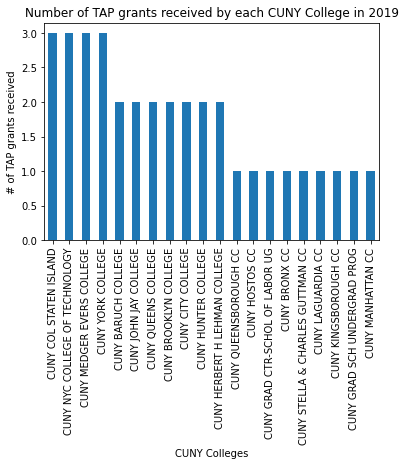

In [99]:
y2019_cuny_tap_data["Tap College Name"].value_counts().plot.bar()
plt.title("Number of TAP grants received by each CUNY College in 2019")
plt.xlabel("CUNY Colleges")
plt.ylabel("# of TAP grants received")

Text(0, 0.5, '# of TAP grants received')

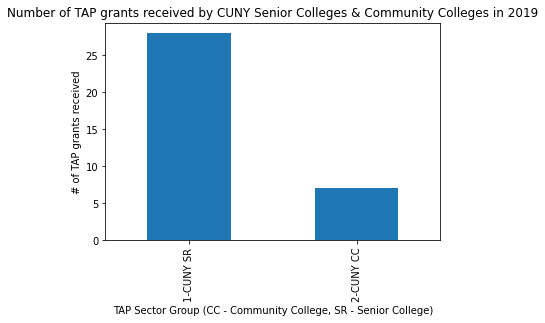

In [101]:
y2019_cuny_tap_data["TAP Sector Group"].value_counts().plot.bar()
plt.title("Number of TAP grants received by CUNY Senior Colleges & Community Colleges in 2019")
plt.xlabel("TAP Sector Group (CC - Community College, SR - Senior College)")
plt.ylabel("# of TAP grants received")

Text(0, 0.5, 'Frequency')

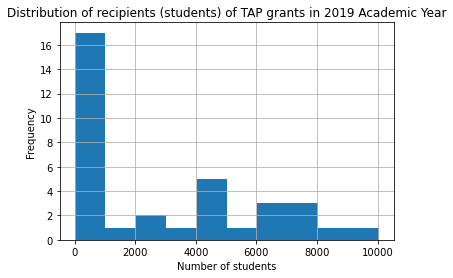

In [145]:
y2019_cuny_tap_data["TAP Recipient Headcount"].hist()
plt.title("Distribution of recipients (students) of TAP grants in 2019 Academic Year")
plt.xlabel("Number of students")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

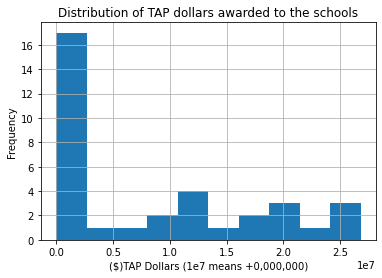

In [148]:
y2019_cuny_tap_data["TAP Recipient Dollars"].hist()
plt.title("Distribution of TAP dollars awarded to the schools")
plt.xlabel("($)TAP Dollars (1e7 means +0,000,000)")
plt.ylabel("Frequency")